In [63]:
import numpy as np
import matplotlib.pyplot as plt
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.Analytic_Classes import SingleParticle
%load_ext autoreload
%autoreload 2
from modules.testing import PointTesting
import modules.Utility as util
import copy


# Create particle distribution to be used in all simulations
#np.random.seed(100)
n_particles = 1000
max_property = 0.01 # property could be mass or charge 
box_size = 1000

# Generate initial particles
#initial_positions = np.random.beta(2,2,(n_particles,2)) * box_size
# initial_positions=[]
# for x in np.linspace(0, box_size, int(np.sqrt(n_particles)), False):
#     for y in np.linspace(0, box_size, int(np.sqrt(n_particles)), False):
#         initial_positions.append(np.array([x, y])) 
# initial_positions = np.array(initial_positions)
# print(initial_positions)
initial_positions = np.random.uniform(0,1,(n_particles,2)) * box_size

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(-max_property,max_property)))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1000
Mean:  1.8412300242858632
Median:  1.85064946267331
Min:  1.5669290371281235
Max:  2.129825263870614


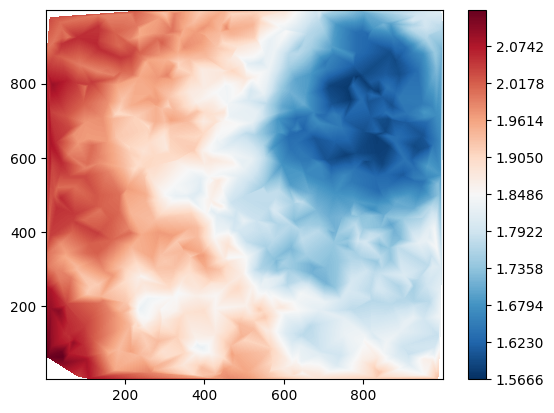

In [64]:
# direct Simulation
direct_particles = copy.deepcopy(initial_particles)
direct_simulation = Direct(box_size, direct_particles)
direct_simulation.run()
util.plot_potentials(direct_particles)

1
2
coarse level:  4
coarse 4 [0, 0] [31.25 31.25]
[ 1.80419792e-02+0.00000000e+00j -9.18029121e-04-5.17821920e-01j
  4.90802702e+00+3.38854166e-01j  8.05367801e+00-9.63621503e+00j
  3.23590375e+03+1.64633373e+03j -1.05842178e+05+1.35623798e+05j
 -3.56187846e+06-4.62400437e+06j  1.49078159e+08-4.65981425e+07j
 -1.10056778e+09+3.13748245e+09j -1.26653218e+08-9.46582749e+10j
  3.14870368e+12+3.83325546e+12j -2.18851000e+14+3.55677946e+13j
  2.52110700e+15-7.68641544e+15j  1.63089793e+17+1.96175614e+17j
 -7.78627613e+18-3.58012512e+17j  2.20726396e+20-1.74284038e+20j
 -9.24219134e+20+1.16621203e+22j -3.58914877e+23-3.05286779e+23j
  1.68097930e+25-4.58119706e+24j -2.25938690e+26+5.63978836e+26j
 -9.69689438e+27-1.90564678e+28j  7.73218218e+29+2.15920204e+29j
 -2.60299453e+31+1.76351879e+31j  7.89042793e+31-1.21404537e+33j
  3.42984094e+34+2.99391773e+34j -1.64439025e+36+2.96247158e+35j
  3.08876560e+37-5.36341070e+37j  7.90346986e+38+2.21264853e+39j
 -8.50357894e+40-3.07071079e+40j  2.950

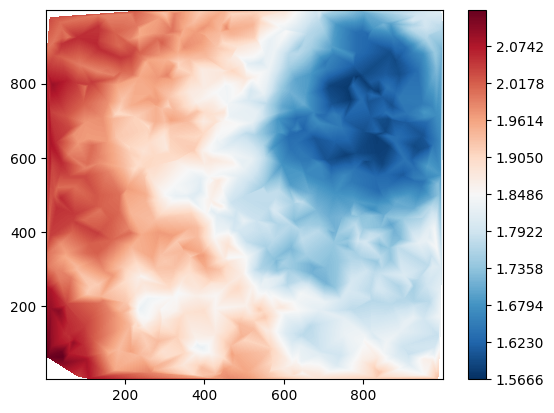

In [65]:
# FMM Simulation
expansion_order = 64
fmm_particles = copy.deepcopy(initial_particles)
fmm_simulation = FMM(box_size, fmm_particles, p=expansion_order)
fmm_simulation.run()

util.plot_potentials(fmm_particles)

Mean:  -15.311024230291111242
Median:  -15.197254953337275189
Min:  -18.063531745299452562
Max:  -14.468053365164965029


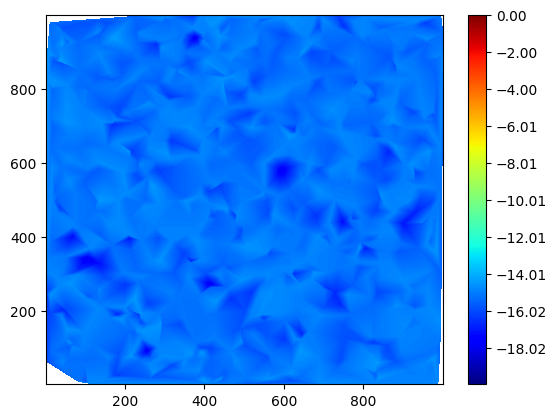

In [66]:
util.plot_log_relative_errors(fmm_particles, direct_particles, [-20,0])